In [104]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [105]:
data = pd.read_excel('Iris.xls')
data.head()

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


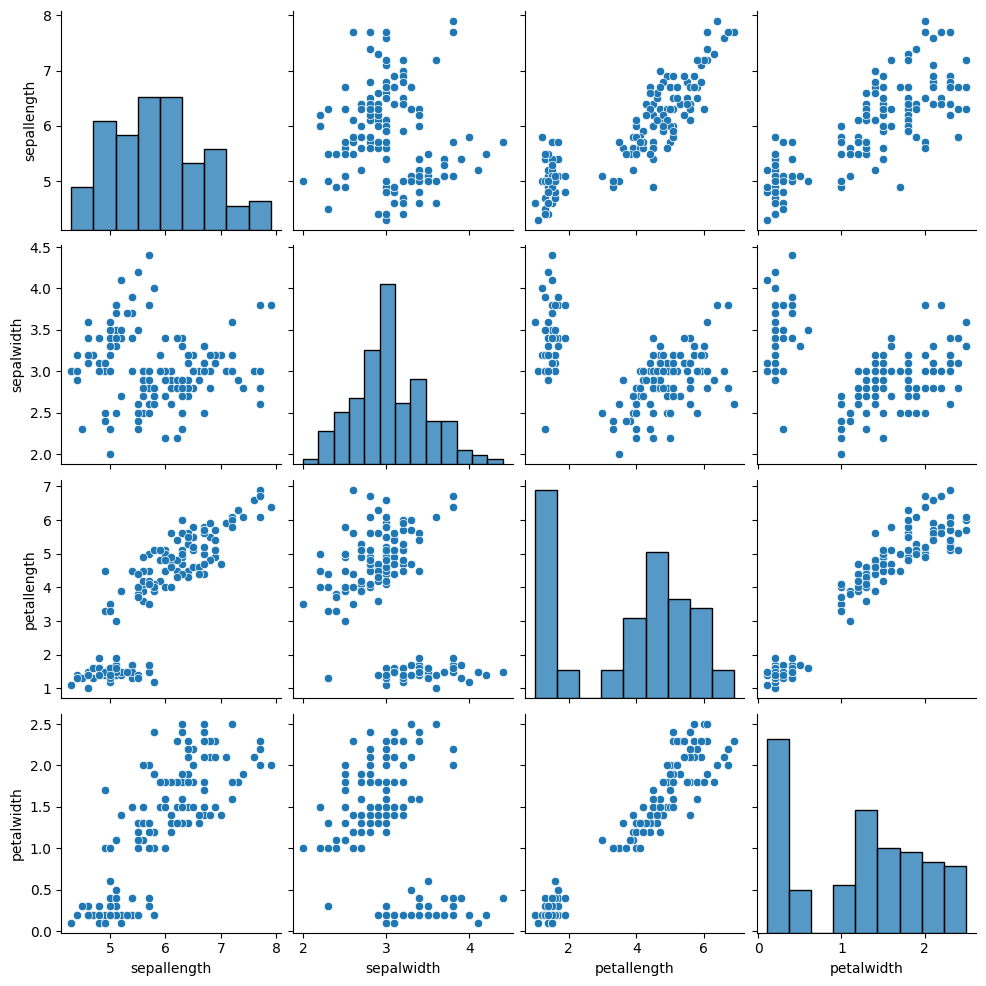

In [106]:
sns.pairplot(data)

In [107]:
data.corr()

,sepallength,sepalwidth,petallength,petalwidth
sepallength,1.000000,-0.109369,0.871754,0.817954
sepalwidth,-0.109369,1.000000,-0.420516,-0.356544
petallength,0.871754,-0.420516,1.000000,0.962757
petalwidth,0.817954,-0.356544,0.962757,1.000000


In [108]:
# Correlation Matrix with Heatmap

In [109]:
top_corr_features = data.corr().index
top_corr_features

Index(['sepallength', 'sepalwidth', 'petallength', 'petalwidth'], dtype='object')

<AxesSubplot: >

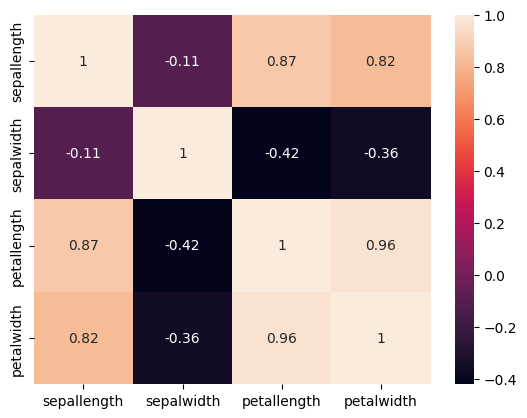

In [110]:
sns.heatmap(data[top_corr_features].corr(),annot=True)

# Chuẩn bị dữ liệu

In [111]:
inputs = data[['sepallength',	'sepalwidth',	'petallength']]
inputs

,sepallength,sepalwidth,petallength
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4
...,...,...,...
145,6.7,3.0,5.2
146,6.3,2.5,5.0
147,6.5,3.0,5.2
148,6.2,3.4,5.4


In [112]:
outputs = data['petalwidth']
outputs

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petalwidth, Length: 150, dtype: float64

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,outputs,test_size=0.2, random_state= 42)

# Import model

In [114]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [115]:
models = LinearRegression()
models.fit(X_train,y_train)

LinearRegression()

In [116]:
# Hệ số chặn - intercept
models.intercept_

-0.17909974053441657

In [130]:
# Độ dốc slope
models.coef_

array([-0.23786906,  0.24296112,  0.5367048 ])

In [118]:
y_pred = models.predict(X_test)

## Đánh giá mức độ phù hơp của mô hình

In [119]:
# R2 cho toàn dữ liệu
models.score(inputs,outputs)

0.9377566335696046

In [120]:
# R2 cho train data
models.score(X_train, y_train)

0.9406642953714707

In [121]:
# R2 cho test data
models.score(X_test,y_test)

0.9269445514568615

In [122]:
# Đánh giá mức độ giải thích của mô hình mae, mse

In [123]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [124]:
mse = mean_squared_error(y_pred,y_test)
mse

0.04643810173004898

In [125]:
mae = mean_absolute_error(y_pred,y_test)
mae

0.15902189408975373

Đặt giới hạn trục x và y là 10.000 để chúng ta có được cái nhìn rõ hơn về vị trí của hầu hết các điểm dữ liệu.
Thêm line có độ dốc 1 đóng vai trò là tham chiếu. Nếu tất cả các điểm nằm trên line này, điều đó có nghĩa là có một mối quan hệ hoàn hảo giữa thực tế và dự đoán.

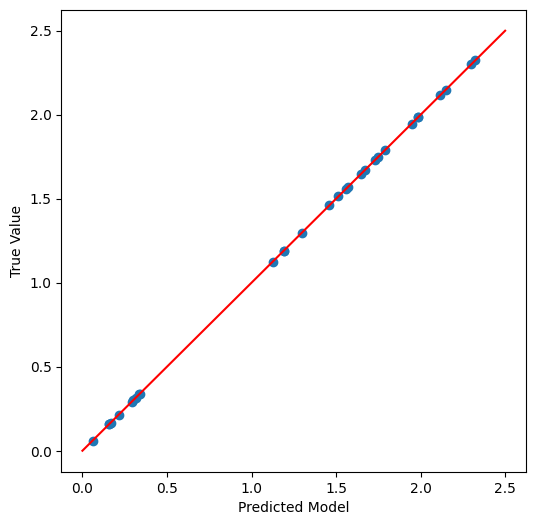

In [126]:
plt.figure(figsize=(6,6))
plt.scatter(x=models.predict(X_test), y=y_pred)
plt.xlabel('Predicted Model')
plt.ylabel('True Value')
plt.plot([0,2.5],[0,2.5],'-',color='red')
plt.show()

In [127]:
reg_line = models.predict(inputs)

Sử dụng Selection K Best

In [143]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [152]:
bestfeartures = SelectKBest(score_func=f_regression,k='all')
fit = bestfeartures.fit(inputs,outputs)

data_score = pd.DataFrame(fit.scores_)
data_column = pd.DataFrame(inputs.columns)

In [153]:
table = pd.concat([data_column,data_score],axis=1)
table.columns=['Tên loài','Điểm']
table.sort_values('Điểm',ascending=False,inplace=True)
table

,Tên loài,Điểm
2,petallength,1876.657813
0,sepallength,299.194957
1,sepalwidth,21.554378
